<a href="https://colab.research.google.com/github/sweety001/Leveraging-Artificial-Intelligence-models-for-analyzing-the-effect-of-Covid-vaccination/blob/main/Covid_(deaths).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# India Covid Second Wave Deaths 2
Dependent variable: new_deaths_perthousand

Independent variables: people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, stringency_index, new_tests_perthousand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DataCovid = pd.read_csv("/content/drive/MyDrive/DataSet/copy-owid-covid-data.csv")
DataCovid.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 59,new_cases_permillion,new_deaths_permillion,new_tests_permillion,new_tests_perthousand,new_cases_perthousand,new_deaths_perthousand
0,AFG,AFG,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000001,0.0,0.0,0.0,0.001,0.0
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0


In [4]:
DataCovid.insert(loc=0, column='A', value=np.arange(len(DataCovid)))

In [5]:
InpData = DataCovid[['A', 'date', 'location', 'new_deaths_perthousand', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'new_tests_perthousand']]
InpData.head()

,A,date,location,new_deaths_perthousand,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,new_tests_perthousand
0,0,24-02-2020,Afghanistan,0.0,NaN,NaN,8.33,0.0
1,1,25-02-2020,Afghanistan,0.0,NaN,NaN,8.33,0.0
2,2,26-02-2020,Afghanistan,0.0,NaN,NaN,8.33,0.0
3,3,27-02-2020,Afghanistan,0.0,NaN,NaN,8.33,0.0
4,4,28-02-2020,Afghanistan,0.0,NaN,NaN,8.33,0.0


In [6]:
InpIndia = InpData[InpData['location'] == 'India']

In [7]:
InpIndia.tail()

,A,date,location,new_deaths_perthousand,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,new_tests_perthousand
39155,39155,31-05-2021,India,2.795,12.12,3.13,81.94,1683.135
39156,39156,01-06-2021,India,3.207,12.29,3.16,NaN,1925.374
39157,39157,02-06-2021,India,2.887,12.45,3.17,NaN,3265.073
39158,39158,03-06-2021,India,2.713,12.63,3.19,NaN,3725.318
39159,39159,04-06-2021,India,3.380,12.98,3.22,NaN,3651.198


In [8]:
InpIndiaSW = InpIndia[InpIndia['A'] >= 39053]
InpIndiaSW.tail()
InpIndiaSW.isna().any()

A                                      False
date                                   False
location                               False
new_deaths_perthousand                 False
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
stringency_index                        True
new_tests_perthousand                  False
dtype: bool

In [9]:
InpIndiaSW.dropna(inplace=True)
print(InpIndiaSW.shape)
InpIndiaSW.isna().any()

(99, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


A                                      False
date                                   False
location                               False
new_deaths_perthousand                 False
people_vaccinated_per_hundred          False
people_fully_vaccinated_per_hundred    False
stringency_index                       False
new_tests_perthousand                  False
dtype: bool

**Plotting the Data**

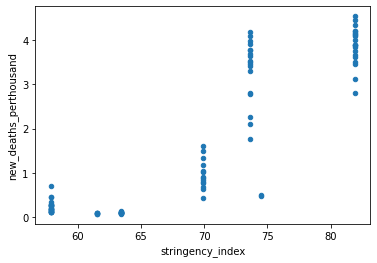

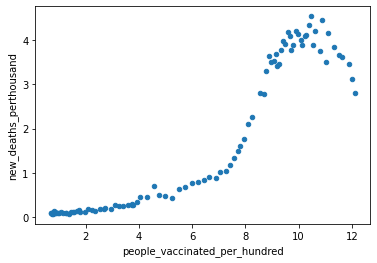

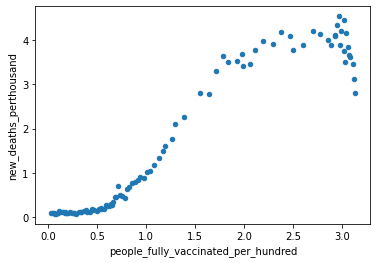

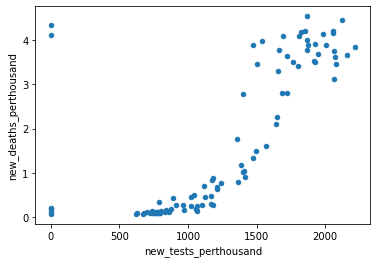

In [10]:
InpIndiaSW.plot(kind= 'scatter', x = 'stringency_index', y='new_deaths_perthousand')
InpIndiaSW.plot(kind= 'scatter', x = 'people_vaccinated_per_hundred', y='new_deaths_perthousand')
InpIndiaSW.plot(kind= 'scatter', x = 'people_fully_vaccinated_per_hundred', y='new_deaths_perthousand')
InpIndiaSW.plot(kind= 'scatter', x = 'new_tests_perthousand', y='new_deaths_perthousand')

In [11]:
X = InpIndiaSW.iloc[:,4:8].values
y= InpIndiaSW.iloc[:,3].values
#X
#InpIndia.new_deaths_perthousand.max()

In [12]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =0)

In [13]:
#scalling the Data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Random Forest Regressor** 

In [14]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators =200, random_state = 0)
RFReg.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [15]:
#for deaths prediction
y_predict_rfr = RFReg.predict((X_test))
y_predict_rfr
#y_test

array([0.158725, 3.997495, 0.105765, 1.224575, 3.84833 , 3.94692 ,
       0.101405, 3.740935, 1.11174 , 3.83926 , 0.84473 , 4.05774 ,
       3.95542 , 0.110535, 0.10791 , 0.202155, 0.13432 , 0.14889 ,
       0.244125, 0.117465, 0.46176 , 2.06356 , 0.097655, 3.577915,
       0.59969 , 0.65509 , 0.107315, 3.422455, 4.014945, 3.879   ])

In [16]:
#R squared value
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
r_square

0.9830648824492122

In [17]:
#the errors
MAE_RFReg = metrics.mean_absolute_error(y_test,y_predict_rfr)
MSE_RFReg = metrics.mean_squared_error(y_test,y_predict_rfr)
RMSE_RFReg = np.sqrt(metrics.mean_squared_error(y_test,y_predict_rfr))
print(MAE_RFReg)
print(MSE_RFReg)
print(RMSE_RFReg)

0.1438464999999999
0.048937032925833054
0.22121716236728345


In [19]:
deaths_predict = RFReg.predict([[.10, .40, 100, 9],[0.06, 0.3, 50, 98]])
deaths_predict

array([2.167655, 2.02108 ])

**Multiple Linear Regression**

In [20]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.3, random_state =0)

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
intercept = lm.intercept_
coef = lm.coef_
print(intercept)
print(coef)

-1.927808576542393
[5.35188008e-02 1.11987236e+00 2.50880614e-02 8.73905010e-05]


In [23]:
y_predict_LReg = lm.predict(X_test)

In [24]:
MAE_LReg = metrics.mean_absolute_error(y_test,y_predict_LReg)
MSE_LReg = metrics.mean_squared_error(y_test,y_predict_LReg)
RMSE_LReg = np.sqrt(metrics.mean_squared_error(y_test,y_predict_LReg))
print(MAE_LReg)
print(MSE_LReg)
print(RMSE_LReg)

0.3893693730120854
0.28058694008043145
0.5297045781191922


In [25]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='new_deaths_perthousand ~ people_vaccinated_per_hundred+people_fully_vaccinated_per_hundred+stringency_index+ new_tests_perthousand', data = InpIndiaSW).fit()
print(lm.conf_int())
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                            0         1
Intercept                           -2.986184  0.173755
people_vaccinated_per_hundred       -0.066781  0.125201
people_fully_vaccinated_per_hundred  0.905551  1.554036
stringency_index                    -0.010504  0.043619
new_tests_perthousand               -0.000160  0.000423


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     new_deaths_perthousand   R-squared:                       0.920
Model:                                OLS   Adj. R-squared:                  0.916
Method:                     Least Squares   F-statistic:                     269.4
Date:                    Sun, 29 Aug 2021   Prob (F-statistic):           1.42e-50
Time:                            03:52:05   Log-Likelihood:                -65.893
No. Observations:                      99   AIC:                             141.8
Df Residuals:                          94   BIC:                             154.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.4062      0.796     -1.767      0.080      -2.986       0.174
people_vaccinated_per_hundred           0.0292      0.048      0.604      0.547      -0.067       0.125
people_fully_vaccinated_per_hundred     1.2298      0.163      7.531      0.000       0.906       1.554
stringency_index                        0.0166      0.014      1.215      0.227      -0.011       0.044
new_tests_perthousand                   0.0001      0.000      0.894      0.373      -0.000       0.000
==============================================================================
Omnibus:                        3.450   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.762
Skew:                          -0.051   Prob(JB):                        0.152
Kurtosis:                       3.950   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""